In [1]:
from alpaca.data.historical import StockHistoricalDataClient
from alpaca.data.requests import StockBarsRequest
from alpaca.data.timeframe import TimeFrame
from datetime import datetime
from alpaca.data.historical.news import NewsClient
from alpaca.data.requests import NewsRequest
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.dates import DateFormatter
from textblob import TextBlob

In [ ]:

client = StockHistoricalDataClient('', '')

request_params = StockBarsRequest(
    symbol_or_symbols=["AAPL"],
    timeframe=TimeFrame.Day,
    start=datetime.strptime("2022-01-01", '%Y-%m-%d'),
    end=datetime.strptime("2023-12-31", '%Y-%m-%d')
)

bars = client.get_stock_bars(request_params)

# convert to dataframe
bars.df


open    high      low   close  \
symbol timestamp                                                    
AAPL   2022-01-03 05:00:00+00:00  177.83  182.88  177.710  182.01   
       2022-01-04 05:00:00+00:00  182.64  182.94  179.120  179.70   
       2022-01-05 05:00:00+00:00  179.61  180.17  174.640  174.92   
       2022-01-06 05:00:00+00:00  172.70  175.30  171.640  172.00   
       2022-01-07 05:00:00+00:00  172.89  174.14  171.030  172.17   
...                                  ...     ...      ...     ...   
       2023-12-22 05:00:00+00:00  195.18  195.41  192.970  193.60   
       2023-12-26 05:00:00+00:00  193.61  193.89  192.830  193.05   
       2023-12-27 05:00:00+00:00  192.49  193.50  191.090  193.15   
       2023-12-28 05:00:00+00:00  194.14  194.66  193.170  193.58   
       2023-12-29 05:00:00+00:00  193.90  194.40  191.725  192.53   

                                       volume  trade_count        vwap  
symbol timestamp                                                        
AAPL   2022-01-03 05:00:00+00:00  112486091.0     772699.0  181.395005  
       2022-01-04 05:00:00+00:00  106090378.0     831898.0  180.596889  
       2022-01-05 05:00:00+00:00   95142198.0     848518.0  177.382297  
       2022-01-06 05:00:00+00:00  103899632.0     960344.0  173.031383  
       2022-01-07 05:00:00+00:00   94554334.0     715419.0  172.441994  
...                                       ...          ...         ...  
       2023-12-22 05:00:00+00:00   37149570.0     500544.0  194.099383  
       2023-12-26 05:00:00+00:00   28921648.0     488340.0  193.170805  
       2023-12-27 05:00:00+00:00   48092035.0     548205.0  192.535582  
       2023-12-28 05:00:00+00:00   34056639.0     472490.0  193.925614  
       2023-12-29 05:00:00+00:00   42672148.0     509123.0  192.577019  

[501 rows x 7 columns]

In [ ]:
client = NewsClient('', '')

request_params = NewsRequest(
                        symbols="AAPL",
                        start=datetime.strptime("2022-01-01", '%Y-%m-%d'),
                        end=datetime.strptime("2023-12-31", '%Y-%m-%d')
                        )

news = client.get_news(request_params).df

In [4]:
bars_df = bars.df.copy().reset_index()
bars_df['timestamp'] = pd.to_datetime(bars_df['timestamp'])

# --- 1️⃣ Basic Overview ---
print("Basic Info:")
print(bars_df.info())
print("\nDescriptive Stats:")
print(bars_df.describe())

Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype              
---  ------       --------------  -----              
 0   symbol       501 non-null    object             
 1   timestamp    501 non-null    datetime64[ns, UTC]
 2   open         501 non-null    float64            
 3   high         501 non-null    float64            
 4   low          501 non-null    float64            
 5   close        501 non-null    float64            
 6   volume       501 non-null    float64            
 7   trade_count  501 non-null    float64            
 8   vwap         501 non-null    float64            
dtypes: datetime64[ns, UTC](1), float64(7), object(1)
memory usage: 35.4+ KB
None

Descriptive Stats:
             open        high         low       close        volume  \
count  501.000000  501.000000  501.000000  501.000000  5.010000e+02   
mean   163.511980  165.365519  161.818139  163

In [5]:
bars_df['daily_return'] = bars_df['close'].pct_change() * 100  # percent change
bars_df['rolling_mean'] = bars_df['close'].rolling(5).mean()
bars_df['rolling_std'] = bars_df['close'].rolling(5).std()


Correlation Matrix:
                   open      high       low     close    volume  trade_count  \
open          1.000000  0.996629  0.996468  0.990750 -0.468032    -0.147416   
high          0.996629  1.000000  0.996583  0.996011 -0.446607    -0.125730   
low           0.996468  0.996583  1.000000  0.996501 -0.493088    -0.183727   
close         0.990750  0.996011  0.996501  1.000000 -0.469455    -0.159903   
volume       -0.468032 -0.446607 -0.493088 -0.469455  1.000000     0.811073   
trade_count  -0.147416 -0.125730 -0.183727 -0.159903  0.811073     1.000000   
vwap          0.995405  0.998642  0.998795  0.998538 -0.470364    -0.158027   
daily_return -0.028736  0.021679  0.026362  0.084108 -0.032924    -0.139946   

                  vwap  daily_return  
open          0.995405     -0.028736  
high          0.998642      0.021679  
low           0.998795      0.026362  
close         0.998538      0.084108  
volume       -0.470364     -0.032924  
trade_count  -0.158027     -0.13

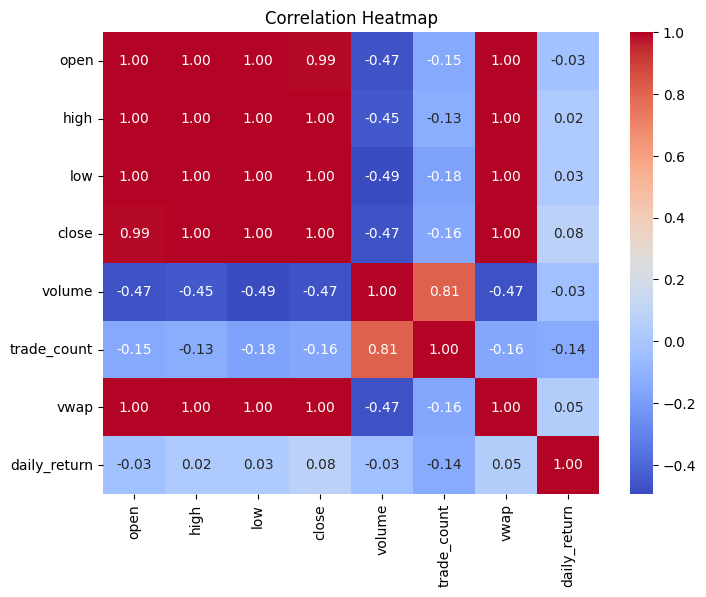

In [6]:
corr = bars_df[['open', 'high', 'low', 'close', 'volume', 'trade_count', 'vwap', 'daily_return']].corr()
print("\nCorrelation Matrix:\n", corr)

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

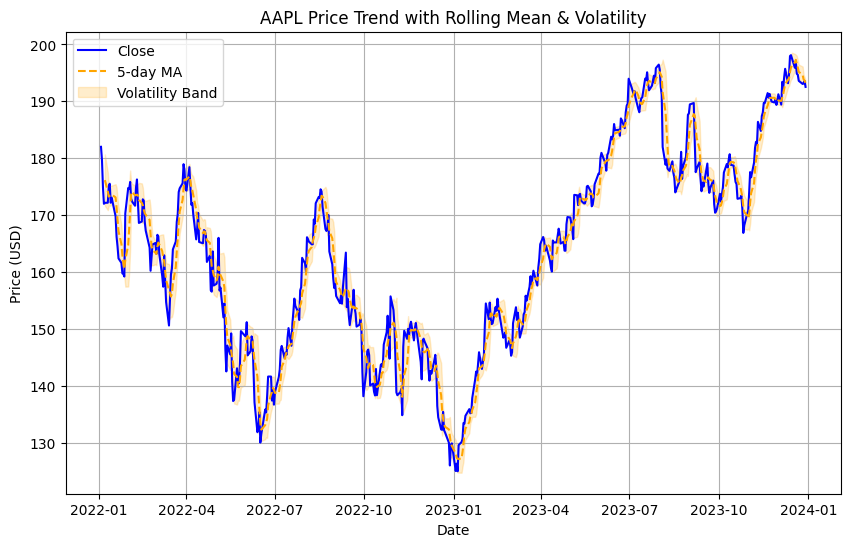

In [7]:
plt.figure(figsize=(10,6))
plt.plot(bars_df['timestamp'], bars_df['close'], label='Close', color='blue')
plt.plot(bars_df['timestamp'], bars_df['rolling_mean'], label='5-day MA', color='orange', linestyle='--')
plt.fill_between(bars_df['timestamp'],
                 bars_df['rolling_mean'] - bars_df['rolling_std'],
                 bars_df['rolling_mean'] + bars_df['rolling_std'],
                 color='orange', alpha=0.2, label='Volatility Band')
plt.title('AAPL Price Trend with Rolling Mean & Volatility')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

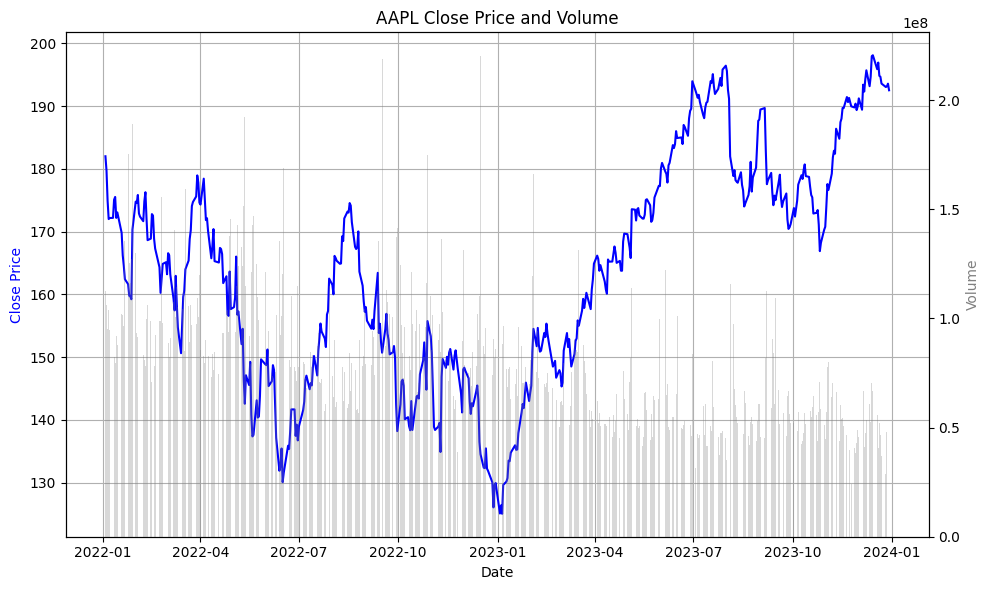

In [8]:
fig, ax1 = plt.subplots(figsize=(10,6))
ax1.set_xlabel('Date')
ax1.set_ylabel('Close Price', color='blue')
ax1.plot(bars_df['timestamp'], bars_df['close'], color='blue', label='Close')

ax2 = ax1.twinx()
ax2.set_ylabel('Volume', color='gray')
ax2.bar(bars_df['timestamp'], bars_df['volume'], color='gray', alpha=0.3, label='Volume')

ax1.set_title('AAPL Close Price and Volume')
ax1.grid(True)
fig.tight_layout()
plt.show()

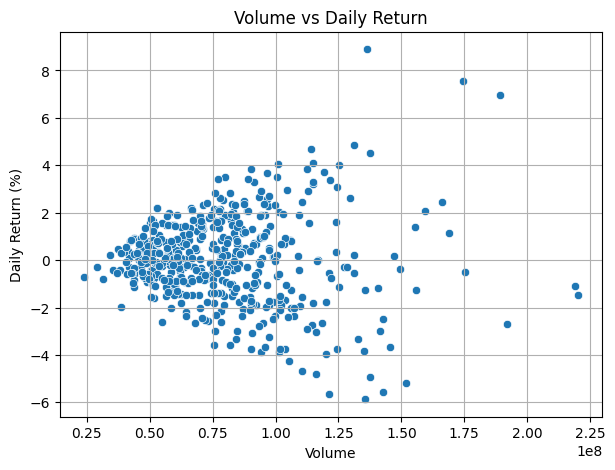

In [9]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=bars_df, x='volume', y='daily_return')
plt.title('Volume vs Daily Return')
plt.xlabel('Volume')
plt.ylabel('Daily Return (%)')
plt.grid(True)
plt.show()

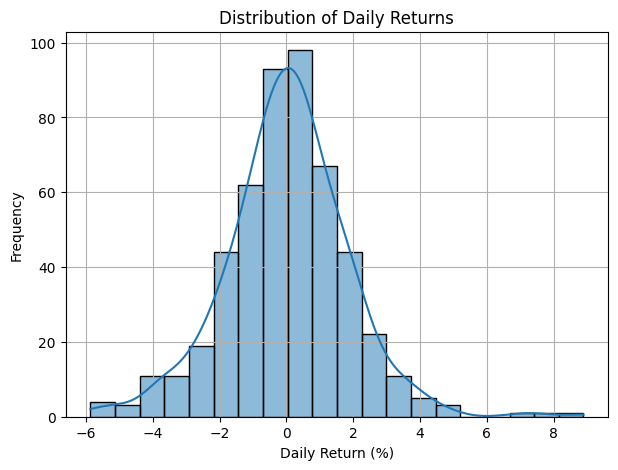

In [10]:
plt.figure(figsize=(7,5))
sns.histplot(bars_df['daily_return'].dropna(), bins=20, kde=True)
plt.title('Distribution of Daily Returns')
plt.xlabel('Daily Return (%)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [11]:
news_df = news.copy().reset_index()
news_df['created_at'] = pd.to_datetime(news_df['created_at'])
news_df['date'] = news_df['created_at'].dt.date

# --- 1️⃣ Sentiment Scoring ---
# Combine headline and summary for better signal
news_df['text'] = news_df['headline'].fillna('') + '. ' + news_df['summary'].fillna('')

# Apply TextBlob sentiment
news_df['sentiment'] = news_df['text'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

# Sentiment ranges from -1 (very negative) to +1 (very positive)
print("\nSample sentiment scores:")
print(news_df[['headline', 'sentiment']].head())


Sample sentiment scores:
                                            headline  sentiment
0  Benzinga Bulls And Bears: Tesla, Apple, Micros...   0.375000
1  Foldable Phones Battle For Market Share: Samsu...   0.000000
2  Gary Black Says Apple Should Buy Rivian To Cat...  -0.083333
3  2023's Top Dogs: Nvidia, Meta Lead S&P 500 Cha...   0.312500
4  CEO Elon Musk Reiterates Tesla Market Cap Coul...  -0.062500


In [12]:
# --- 2️⃣ Aggregate by Day ---
daily_sentiment = (
    news_df.groupby('date')['sentiment']
    .mean()
    .reset_index()
    .rename(columns={'sentiment': 'avg_sentiment'})
)

print("\nDaily average sentiment:")
print(daily_sentiment)


Daily average sentiment:
           date  avg_sentiment
0    2020-10-07       0.214286
1    2020-10-09       0.300000
2    2021-01-06       0.033144
3    2021-08-03       0.154167
4    2021-08-12       0.187500
..          ...            ...
714  2023-12-26       0.152649
715  2023-12-27       0.167366
716  2023-12-28       0.190530
717  2023-12-29       0.203939
718  2023-12-30       0.057292

[719 rows x 2 columns]


In [13]:
# --- 3️⃣ Merge with Stock Data ---
bars_df['date'] = bars_df['timestamp'].dt.date
merged_df = bars_df.merge(daily_sentiment, on='date', how='left')

In [14]:
merged_df

,symbol,timestamp,open,high,low,close,volume,trade_count,vwap,daily_return,rolling_mean,rolling_std,date,avg_sentiment
0,AAPL,2022-01-03 05:00:00+00:00,177.83,182.88,177.710,182.01,112486091.0,772699.0,181.395005,NaN,NaN,NaN,2022-01-03,0.114655
1,AAPL,2022-01-04 05:00:00+00:00,182.64,182.94,179.120,179.70,106090378.0,831898.0,180.596889,-1.269161,NaN,NaN,2022-01-04,0.024376
2,AAPL,2022-01-05 05:00:00+00:00,179.61,180.17,174.640,174.92,95142198.0,848518.0,177.382297,-2.659989,NaN,NaN,2022-01-05,0.089946
3,AAPL,2022-01-06 05:00:00+00:00,172.70,175.30,171.640,172.00,103899632.0,960344.0,173.031383,-1.669335,NaN,NaN,2022-01-06,0.000357
4,AAPL,2022-01-07 05:00:00+00:00,172.89,174.14,171.030,172.17,94554334.0,715419.0,172.441994,0.098837,176.160,4.514349,2022-01-07,0.079487
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,AAPL,2023-12-22 05:00:00+00:00,195.18,195.41,192.970,193.60,37149570.0,500544.0,194.099383,-0.554757,195.188,1.271837,2023-12-22,0.190735
497,AAPL,2023-12-26 05:00:00+00:00,193.61,193.89,192.830,193.05,28921648.0,488340.0,193.170805,-0.284091,194.620,1.494607,2023-12-26,0.152649
498,AAPL,2023-12-27 05:00:00+00:00,192.49,193.50,191.090,193.15,48092035.0,548205.0,192.535582,0.051800,193.862,0.842775,2023-12-27,0.167366
499,AAPL,2023-12-28 05:00:00+00:00,194.14,194.66,193.170,193.58,34056639.0,472490.0,193.925614,0.222625,193.612,0.646351,2023-12-28,0.190530


In [ ]:
merged_df.to_csv('data/raw/data.csv', index = False)

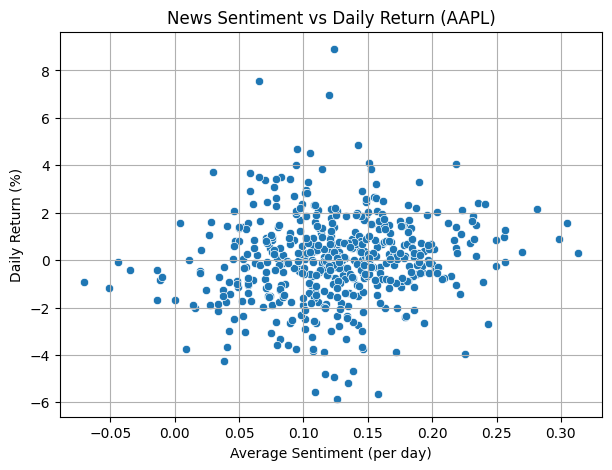

In [16]:
# --- 4️⃣ Plot Sentiment vs Daily Return ---
plt.figure(figsize=(7,5))
sns.scatterplot(data=merged_df, x='avg_sentiment', y='daily_return')
plt.title('News Sentiment vs Daily Return (AAPL)')
plt.xlabel('Average Sentiment (per day)')
plt.ylabel('Daily Return (%)')
plt.grid(True)
plt.show()

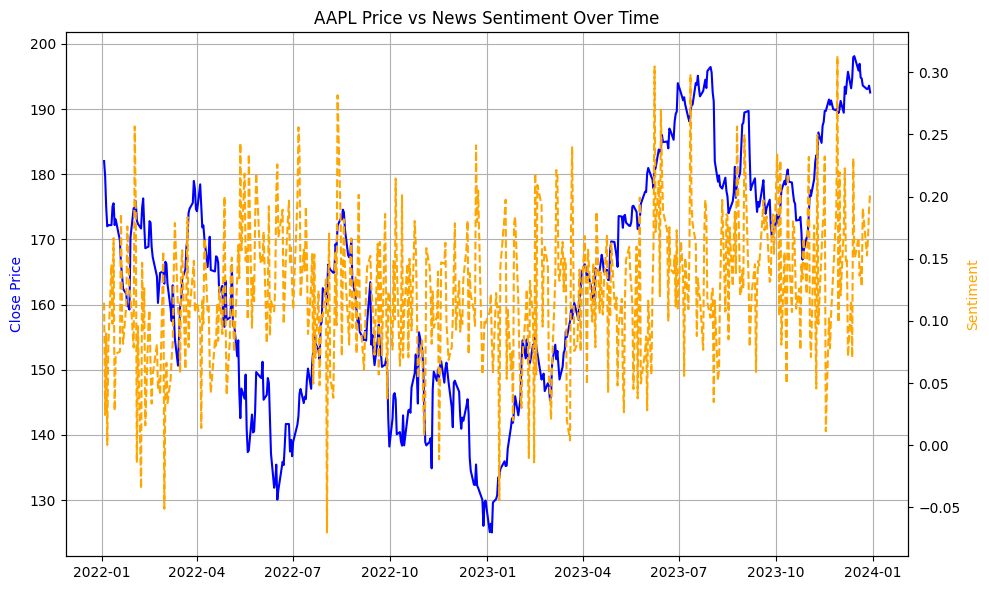

In [17]:
# --- 5️⃣ Time Series Comparison ---
fig, ax1 = plt.subplots(figsize=(10,6))
ax1.plot(merged_df['timestamp'], merged_df['close'], color='blue', label='Close Price')
ax1.set_ylabel('Close Price', color='blue')

ax2 = ax1.twinx()
ax2.plot(merged_df['timestamp'], merged_df['avg_sentiment'], color='orange', label='Sentiment (avg)', linestyle='--')
ax2.set_ylabel('Sentiment', color='orange')

ax1.set_title('AAPL Price vs News Sentiment Over Time')
ax1.grid(True)
fig.tight_layout()
plt.show()


Correlation with News Sentiment:
avg_sentiment    1.000000
close            0.124100
low              0.122270
daily_return     0.119817
high             0.112366
open             0.110050
volume          -0.177147
Name: avg_sentiment, dtype: float64


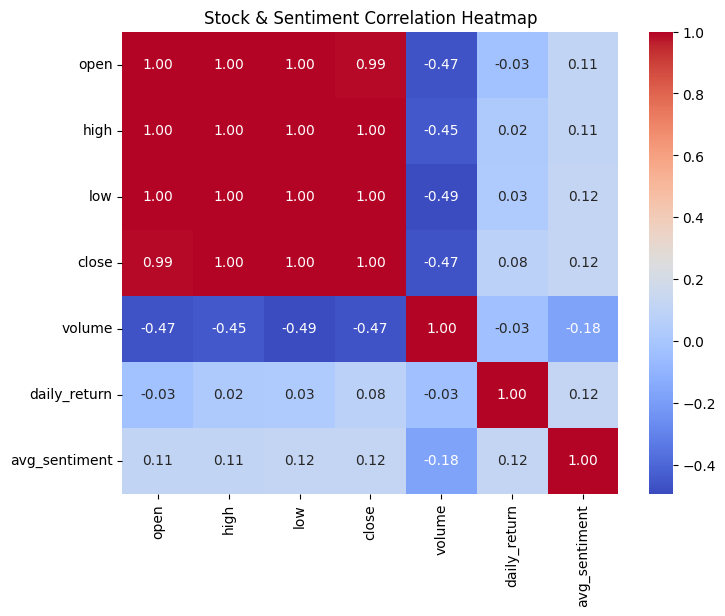

In [18]:
# --- 6️⃣ Correlation Analysis ---
corr_news = merged_df[['open', 'high', 'low', 'close', 'volume', 'daily_return', 'avg_sentiment']].corr()
print("\nCorrelation with News Sentiment:")
print(corr_news['avg_sentiment'].sort_values(ascending=False))

plt.figure(figsize=(8,6))
sns.heatmap(corr_news, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Stock & Sentiment Correlation Heatmap')
plt.show()